For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
Is the website redesign any good?
Is our television ad driving more sales?

### Has the network latency gone up since we switched internet service providers?

Ho - The mean network latency has stayed the same since switching internet providers   
Ha - The mean network latency is different since switching internet providers   

True positive - Mean network latency is different since switching internet providers   
True negative - Mean network latency is the same since switching internet providers   
Type 1 error - We think Mean network latency is different, but it's actually the same     
Type 2 error - We think Mean network latency is the same, but it's actually different       

###  Is the website redesign any good?

Ho - Web traffic has stayed the same since the redesign   
Ha - There has been an increase in web traffic since the redesign   

True positive - There has been an increase in web traffic since the redesign   
True negative - Web traffic has stayed the same since the redesign   
Type 1 error - We think there has been an increase in web traffic but it's actually stayed the same   
Type 2 error - We think web traffic is the same, but it's actually increased   

### Is our television ad driving more sales?

Ho - The number of sales has stayed the same with the ad   
Ha - The number of sales has changed with the ad   

True positive - The number of sales has changed with the ad   
True negative - The number of sales has stayed the same with the ad   
Type 1 error - We think the number of sales has changed but it's actually stayed the same   
Type 2 error - We think the number of sales is the same, but it's actually changed   

### Answer with the type of test you would use (assume normal distribution):

1)Is there a difference in grades of students on the second floor compared to grades of all students?  
2)Are adults who drink milk taller than adults who dont drink milk?  
3)Is the the price of gas higher in texas or in new mexico?  
4)Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

1) One sample t test, two tail (scipy.stats.ttest_1samp)  
2) Independent t test, one tail (scipy.stats.ttest_ind)  
3) Independent t test, two tail (scipy.stats.ttest_ind)  
4) ANOVA (scipy.stats.f_oneway)


### Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?   
Are compact cars more fuel-efficient than the average car?   
Do manual cars get better gas mileage than automatic cars?   

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats



In [16]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [17]:
mpg.year.unique()

array([1999, 2008])

In [18]:
mpg['combined_mpg']= (mpg['cty']+mpg['hwy'])/2

In [19]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,combined_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


H0: There is no difference in the mean fuel-efficiency between cars from 2008 and 1999  
Ha: There is a difference in the mean fuel-efficiency between cars from 2008 and 1999

In [20]:
mpg_08 = mpg[mpg.year==2008].combined_mpg
mpg_99 = mpg[mpg.year==1999].combined_mpg

<AxesSubplot:>

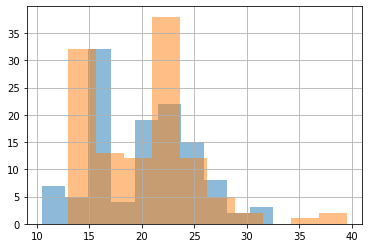

In [23]:
mpg_08.hist(alpha=.5)
mpg_99.hist(alpha=.5)

In [27]:
t, p = stats.ttest_ind(mpg_99,mpg_08)
alpha = .05

In [28]:
if p < alpha:
    print(f"We reject the null hypthesis with p = {p}")
else:
    print(f"We fail to reject the null hypthesis with p = {p}")

We fail to reject the null hypthesis with p = 0.8263744040323578


### Are compact cars more fuel-efficient than the average car?

h0 = The mean fuel-efficiency for compact cars is less than or equal to the average car    
ha = The mean fuel-efficiency for compact cars is greater than the average car 

In [30]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,combined_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [39]:
compact_mpg = mpg[mpg['class']=='compact'].combined_mpg
average_mpg = mpg.combined_mpg

(array([ 0.,  0.,  0.,  9., 17., 16.,  3.,  1.,  0.,  1.]),
 array([10., 13., 16., 19., 22., 25., 28., 31., 34., 37., 40.]),
 <BarContainer object of 10 artists>)

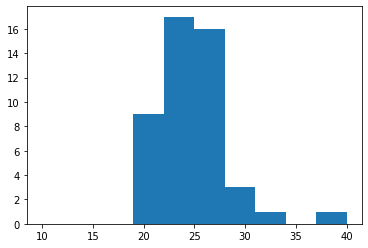

In [60]:
plt.hist(compact_mpg, range = (10,40)) # Normal distribution?

<AxesSubplot:>

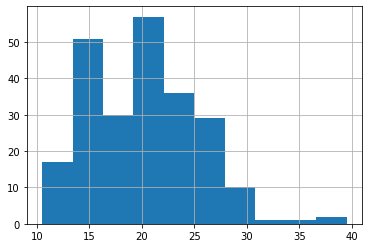

In [46]:
average_mpg.hist() #Normal distribution

In [47]:
len(compact_mpg), len(average_mpg) # More than 30 observations

(47, 234)

In [50]:
t, p = stats.ttest_1samp(compact_mpg,average_mpg.mean())

In [55]:
if p/2 < alpha and t > 0:
    print(f'We reject the null hypothesis: p = {p} and t = {t}')
else:
    print(f'We fail to reject the null hypothesis: p = {p} and t = {t}')

We reject the null hypothesis: p = 4.1985637943171336e-10 and t = 7.896888573132535


### Do manual cars get better gas mileage than automatic cars?

ho: The mean gas mileage for manual cars <= automatic cars  
ha: The mean gas mileage for manual cars > automatic cars  

In [61]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,combined_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [66]:
auto_mpg = mpg[mpg.trans.str.startswith('a')].combined_mpg
man_mpg = mpg[mpg.trans.str.startswith('m')].combined_mpg

In [67]:
len(auto_mpg),len(man_mpg) #Both > 30 observations

(157, 77)

In [68]:
stats.levene(auto_mpg,man_mpg) # p > .05 so variance is equal

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [83]:
t, p = stats.ttest_ind(man_mpg,auto_mpg)

In [72]:
if p/2 < alpha and t > 0 :
    print(f'We reject the Null Hypothesis: p = {p} and t = {t}')
else:
    print(f'We fail to reject the Null Hypothesis: p = {p} and t = {t}')

We reject the Null Hypothesis: p = 7.154374401145683e-06 and t = 4.593437735750014


In [80]:
p, t

(7.154374401145683e-06, 4.593437735750014)

In [82]:
p, t

(3.5771872005728416e-06, 4.593437735750014)

# Correlation

Answer with the type of stats test you would use (assume normal distribution):  
Is there a relationship between the length of your arm and the length of your foot?  
Do guys and gals quit their jobs at the same rate?  
Does the length of time of the lecture correlate with a students grade?  
Use the telco_churn data.  
Does tenure correlate with monthly charges?  
Total charges?  
What happens if you control for phone and internet service?  
Use the employees database.  
Is there a relationship between how long an employee has been with the company and their salary?  
Is there a relationship between how long an employee has been with the company and the number of titles they have had?  
Use the sleepstudy data.  
Is there a relationship between days and reaction time?  

1)Is there a relationship between the length of your arm and the length of your foot?  
2)Do guys and gals quit their jobs at the same rate?  
3)Does the length of time of the lecture correlate with a students grade?  

1) Pearson's correlation  
2) Independent ttest  
3) Pearson's correlation  

Use the telco_churn data.  
Does tenure correlate with monthly charges?  
Total charges?  
What happens if you control for phone and internet service?  

In [93]:
import env
import pandas as pd
from scipy import stats

In [90]:
import env
import pandas as pd
db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  

In [96]:
tenure = df['tenure']
monthly_charges = df['monthly_charges']
r, p = stats.pearsonr(tenure,monthly_charges)
print(f"We observe an r value of {round(r,2)}")

We observe an r value of 0.25


In [104]:
total_charges

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7038      742.9
7039     1873.7
7040      92.75
7041    4627.65
7042     3707.6
Name: total_charges, Length: 7043, dtype: object

In [124]:
#Remove spaces in strings and convert to float
df['total_charges'] = pd.to_numeric(df['total_charges'].str.replace(' ',''))
df = df.dropna()

In [126]:
r, p = stats.pearsonr(df['tenure'],df['total_charges'])
print(f"We observe an r value of {round(r,2)} between tenure and total charges")

We observe an r value of 0.83 between tenure and total charges


What happens if you control for phone and internet service? 'phone_service'-'internet_service_type_id'

### Controlling for Phone

In [130]:
tenure_with_phone = df[df['phone_service']=='Yes']['tenure']
tot_charges_with_phone = df[df['phone_service']=='Yes']['total_charges']

In [132]:
r, p = stats.pearsonr(tenure_with_phone,tot_charges_with_phone)
print(f"We observe an r value of {round(r,2)} between tenure and total charges controlling for phone")

We observe an r value of 0.83 between tenure and total charges controlling for phone


In [142]:
tenure_with_internet = df[df['internet_service_type_id']==1]['tenure']
tot_charges_with_internet = df[df['internet_service_type_id']==1]['total_charges']

### Controlling for internet

In [143]:
r, p = stats.pearsonr(tenure_with_internet,tot_charges_with_internet)
print(f"We observe an r value of {round(r,2)} between tenure and total charges controlling for internet")

We observe an r value of 0.94 between tenure and total charges controlling for internet


### Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?   
Is there a relationship between how long an employee has been with the company and the number of titles they have had?  

In [145]:
db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
employees = pd.read_sql('SELECT * FROM employees JOIN salaries USING (emp_no)', db_url)  

In [151]:
import datetime
date_before = datetime.date(2016, 1, 19)
employees = employees[employees['to_date']>date_before]

### Is there a relationship between how long an employee has been with the company and their salary?

In [155]:
employees['time_with_company'] = datetime.date(2022,12,2)-employees['hire_date']

In [166]:
employees['time_with_company'] = employees['time_with_company'].astype('int')/10**9/3.154e+7


/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_19060/4101035536.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  employees['time_with_company'] = employees['time_with_company'].astype('int')/10**9/3.154e+7


There is a correlation value of .3 between time with company and salary

In [168]:
stats.pearsonr(employees['time_with_company'],employees['salary'])

(0.30646256131860894, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [169]:
db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
df = pd.read_sql('SELECT * FROM employees JOIN titles USING (emp_no)', db_url)  

In [172]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [175]:
df['time_with_company'] = datetime.date(2022,12,2)-employees['hire_date']


In [176]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,time_with_company
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,NaT
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,NaT
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,NaT
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,NaT
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,NaT
